In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
Session_link = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
#Imported inspector to find column names for each table to more accurately query 
Inspector = inspect(engine)
Measurement_columns = Inspector.get_columns("Measurement")
for c in Measurement_columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
#To get most recent date; sort in descending order and pick first;
Most_recent = Session_link.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(Most_recent)

('2017-08-23',)


In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set
# Perform a query to retrieve the data and precipitation scores

Measurements = (Measurement.date, Measurement.prcp)
Precip = Session_link.query(*Measurements).\
   filter(Measurement.date >= '2016-08-22').all()
Precip[:5]






[('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0)]

In [41]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
Precip_final = pd.DataFrame(Precip,columns=['Measurement_date', 'Precipitation_amount'])
Precip_final = Precip_score.set_index("date")
Precip_final


,prcp
date,
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


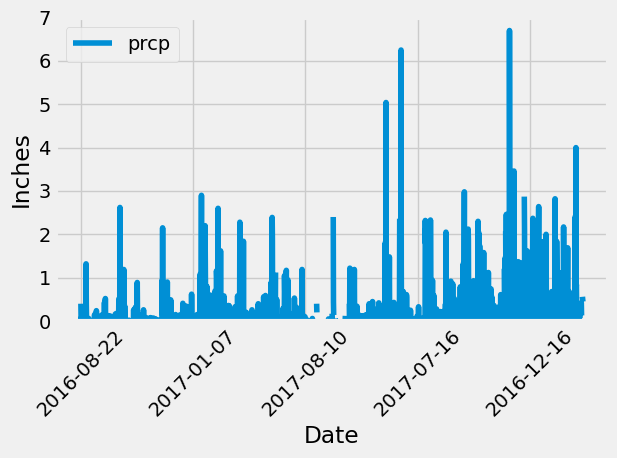

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data
Precip_final.plot()
plt.ylim(0,7)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [43]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precip_final.describe()

,prcp
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number of stations in the dataset
Session_link.query(func.count(distinct(Measurement.station))).all()

[(9,)]

In [45]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.date)]
Active_stations = Session_link.query(*sel).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.date).desc()).all()
Active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
Station_summary = Session_link.query(*sel).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station)
for station in Station_summary:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, 
       Measurement.tobs]
Station_temps = Session_link.query(*sel).\
        filter(func.strftime(Measurement.date) >= date, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()

NameError: name 'date' is not defined

In [48]:
#Make the histogram
plt.hist(Station_temps['Temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Temperature Observations at USC00519281")
plt.figsize=(10,7)
plt.savefig('Annual_Temps_USC00519281.png',bbox_inches='tight')
plt.show()

NameError: name 'Station_temps' is not defined

# Close Session

In [ ]:
# Close Session
#session.close()